In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os

In [23]:
def process_csv(file_name, metric):
    """ Function to process a csv file and extract the metric of interest and use the row number.
    
    Args:
        file_name (str): Name of the csv file
        metric (str): Metric of interest
    Returns:
        df (pandas.DataFrame): Dataframe with the metric and row number
    """
    df = pd.read_csv(file_name)
    # Convert the string representation of dictionary to actual dictionary
    df['best_data'] = df['best_data'].apply(ast.literal_eval)
    # Extract the metric of interest
    df[metric] = df['best_data'].apply(lambda x: x[metric])
    # Add a new column for the row number
    df = df.reset_index().rename(columns={'index': 'row_number'})
    return df[['row_number', metric]]

def compare_single_metric(metric, file1, file2, x_label, y_label, plot_title, labelling):
    """ Function to compare a single metric between two files.
    
    Args:
        metric (str): Metric of interest
        file1 (str): Name of the first csv file
        file2 (str): Name of the second csv file
        x_label (str): Label for the x-axis
        y_label (str): Label for the y-axis
        plot_title (str): Title for the plot
        labelling (str): Label for the color bar
    Returns:
        None
    """
    df1 = process_csv(file1, metric)
    df2 = process_csv(file2, metric)
    
    # Merge the two dataframes on circuit label
    merged_df = pd.merge(df1, df2, on='row_number', suffixes=('_file1', '_file2'))
    
    # Plotting
    plt.figure(figsize=(10, 7))
    
    # Create a scatter plot to compare the metrics using Seaborn
    scatter = sns.scatterplot(x=f'{metric}_file1', y=f'{metric}_file2', 
                              hue='row_number', data=merged_df, 
                              palette='viridis', alpha=0.7)
    
    # Set the scale to logarithmic
    plt.xscale('log')
    plt.yscale('log')

    # Adding labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    
    # Plot a reference line where the metrics would be equal in both files
    min_val = min(merged_df[f'{metric}_file1'].min(), merged_df[f'{metric}_file2'].min())
    max_val = max(merged_df[f'{metric}_file1'].max(), merged_df[f'{metric}_file2'].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1)
    
    # Create a color bar for the circuit labels
    # Create a color bar for the row numbers
    norm = plt.Normalize(merged_df['row_number'].min(), merged_df['row_number'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=scatter.axes)
    cbar.set_label(labelling)
    
    # Show the plot with a grid
    plt.grid(True)
    plt.show()

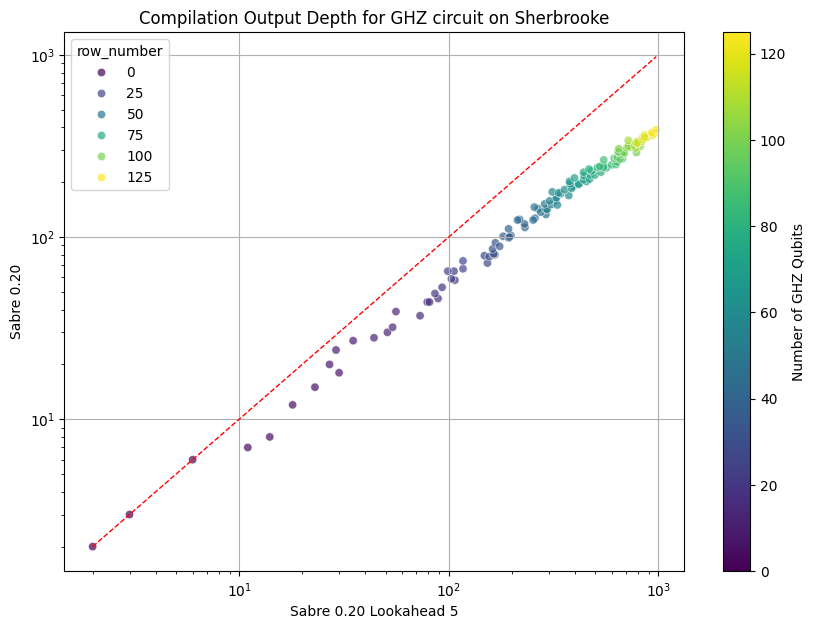

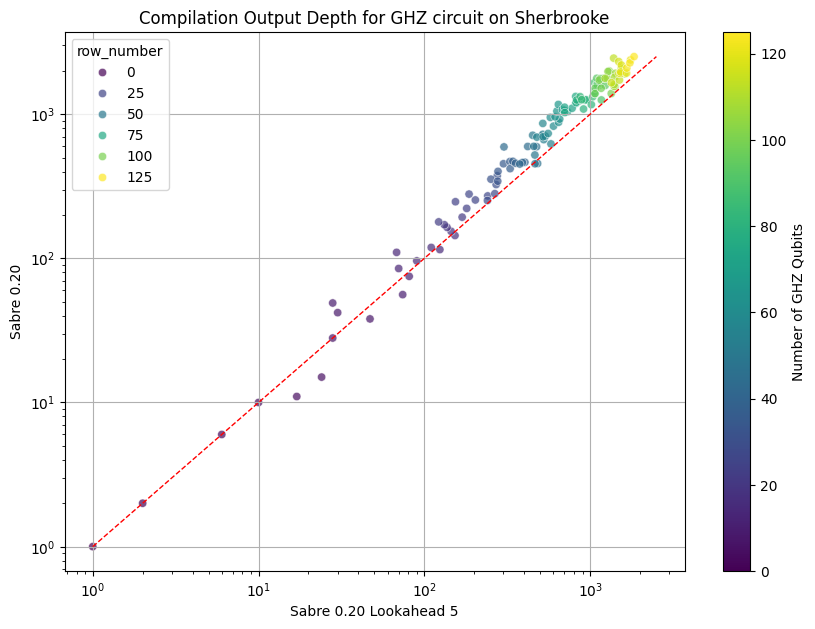

In [24]:
file1 = "data/ghz_2-127/sabre_v020.csv"
file2 = "data/ghz_2-127/sabre_v020_depth.csv"
compare_single_metric('depth', file1, file2, "Sabre 0.20 Lookahead 5", "Sabre 0.20", "Compilation Output Depth for GHZ circuit on Sherbrooke", "Number of GHZ Qubits")
compare_single_metric('cx_gates', file1, file2, "Sabre 0.20 Lookahead 5", "Sabre 0.20", "Compilation Output Depth for GHZ circuit on Sherbrooke", "Number of GHZ Qubits")